<a href="https://colab.research.google.com/github/SophieShin/CLA3109_class/blob/main/Audit_Opinion_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!sudo fc-cache -fvㅓ
!pip install kiwipiepy tomotopy flashtext -q

Selecting previously unselected package fonts-nanum.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs

In [6]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.2 MB/s 
     |████████████████████████████████| 453 kB 55.8 MB/s 


In [101]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.colors as clr

from collections import Counter
import regex
import re

from kiwipiepy import Kiwi, Option
kiwi = Kiwi()
kiwi.prepare()

from flashtext import KeywordProcessor
kp = KeywordProcessor()

import tomotopy as tp
print(tp.isa)
import sys

avx2


/usr/local/lib/python3.7/dist-packages/kiwipiepy/_wrap.py:449: DeprecationWarning: `prepare()` has no effect and will be removed in future version.
  DeprecationWarning


In [89]:
import os
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [102]:
import pandas as pd

filename = '/content/gdrive/MyDrive/Colab Notebooks/NLP_Korean(22 spring)/AuditOpinion_21.csv'

df = pd.read_csv(filename, encoding = 'cp949')
df.head()

표준코드   단축코드  한글 종목명 한글 종목약명            영문 종목명         상장일    시장구분  \
0  KR7044180008   9730      코센      코센   KOSSEN Co.,Ltd.  1990-07-27  KOSDAQ   
1  KR7098460009  16670  인피니티엔티  인피니티엔티       INFINITY NT  1993-04-21  KOSDAQ   
2  KR7053270005   6580  대양제지공업    대양제지   DaeyangPaperMfg  1993-12-29  KOSDAQ   
3  KR7293580007  24830    세원물산    세원물산  SewonCorporation  1994-12-29  KOSDAQ   
4  KR7194700001  29480      광무      광무           Kwangmu  1996-08-27  KOSDAQ   

  증권구분          소속부 주식종류  액면가        상장주식수   연결  \
0   주권  관리종목(소속부없음)  보통주  500   18,814,297  1.0   
1   주권  관리종목(소속부없음)  보통주  500  100,258,024  1.0   
2   주권  관리종목(소속부없음)  보통주  500   26,850,000  1.0   
3   주권  관리종목(소속부없음)  보통주  500    8,350,000  1.0   
4   주권  관리종목(소속부없음)  보통주  100  113,955,215  1.0   

                                               감사보고서 수주산업  
0  의견거절\n\n우리는 주식회사 코센과 그 종속기업(이하 "연결실체")의 재무제표에 ...  NaN  
1  감사의견\n우리는 주식회사 인피니티엔티(구, 주식회사 포비스티앤씨)와 그 종속기업(...  NaN  
2  감사의견\n우리는 대양제지공업주식회사와 그 종속기업(이하  "연결회사”)의 연결재무...  NaN  
3  감사의견\n우리는 별첨된 주식회사 세원물산(이하 "회사")의 재무제표를 감사하였습니...  NaN  
4  \n감사의견\n\n우리는 주식회사 광무(이하 "회사")와 그 종속기업(구, 주식회사...  NaN

In [103]:
preprocessed_text = []
for i in range(df.shape[0]):
  text = df.iloc[i, 13]
  text = re.sub(r'㈜',' ', str(text))
  text = re.sub(r'ㆍ', '', str(text))
  text = re.sub(r'[0-9]+', '', str(text))
  text = re.sub(r"\n{1,}", '', str(text))
  text = re.sub(r"[a-zA-Z]{1,}", '', str(text)) 
  text = re.sub(r"\W", ' ', str(text))
  text = re.sub('nan', '', str(text))

  preprocessed_text.append(text)


In [92]:
preprocessed_text

['의견거절우리는 주식회사 코센과 그 종속기업 이하  연결실체  의 재무제표에 대한 감사계약을 체결하였습니다  해당 연결재무제표는 년 월 일 현재의 연결재무상태표  동일로 종료되는 보고기간의 연결포괄손익계산서  연결자본변동표  연결현금흐름표 그리고 유의적인 회계정책의 요약을 포함한 연결재무제표의 주석으로 구성되어 있습니다 우리는 별첨된 연결실체의 연결재무제표에 대하여 의견을 표명하지 않습니다  우리는 이 감사보고서의 의견거절근거 단락에서 기술된 사항의 유의성 때문에 연결재무제표에 대한 감사의견의 근거를 제공하는 충분하고 적합한 감사증거를 입수할 수 없었습니다 의견거절근거  자산의 평가에 대한 감사범위 제한우리는 기말 연결재무제표 상 연결실체 총자산의   인 관계기업 투자주식에 대해 자산 손상징후가 있는지 검토한 결과 그러한 징후가 있다고 판단하였습니다 우리는 년 월 일 현재 연결재무상태표에 계상되어 있는 관계기업투자주식 장부금액   당기  백만원  전기  백만원 에 대한 회사의 손상평가의 적정성과 회계처리의 적정성을 판단하기 위한 충분하고 적합한 감사증거를 제공받지 못하였고 대체적인 절차로도 감사증거를 확보하지 못하였습니다  이로 인하여 우리는 회계감사기준에 따른 감사절차를 수행할 수 없었습니다 기타사항연결실체의 년 월 일로 종료되는 재무제표는 한국회계감사기준에 따라 타감사인이 감사하였으며  이 감사인의 년 월 일자 감사보고서에는 해당 연결재무제표에 대하여 적정의견이 표명되었습니다 연결재무제표에 대한 경영진과 지배기구의 책임경영진은 한국채택국제회계기준에 따라 이 연결재무제표를 작성하고 공정하게 표시할 책임이 있으며  부정이나 오류로 인한 중요한 왜곡표시가 없는 재무제표를 작성하는데 필요하다고 결정한 내부통제에 대해서도 책임이 있습니다 경영진은 연결재무제표를 작성할 때  연결실체의 계속기업으로서의 존속능력을 평가하고 해당되는 경우  계속기업 관련 사항을 공시할 책임이 있습니다  그리고 경영진이 기업을 청산하거나 영업을 중단할 의도가 없는 한  회계의 계속기업전제

In [104]:
df['preprocessed_text'] = pd.Series(preprocessed_text)
df.head()

표준코드   단축코드  한글 종목명 한글 종목약명            영문 종목명         상장일    시장구분  \
0  KR7044180008   9730      코센      코센   KOSSEN Co.,Ltd.  1990-07-27  KOSDAQ   
1  KR7098460009  16670  인피니티엔티  인피니티엔티       INFINITY NT  1993-04-21  KOSDAQ   
2  KR7053270005   6580  대양제지공업    대양제지   DaeyangPaperMfg  1993-12-29  KOSDAQ   
3  KR7293580007  24830    세원물산    세원물산  SewonCorporation  1994-12-29  KOSDAQ   
4  KR7194700001  29480      광무      광무           Kwangmu  1996-08-27  KOSDAQ   

  증권구분          소속부 주식종류  액면가        상장주식수   연결  \
0   주권  관리종목(소속부없음)  보통주  500   18,814,297  1.0   
1   주권  관리종목(소속부없음)  보통주  500  100,258,024  1.0   
2   주권  관리종목(소속부없음)  보통주  500   26,850,000  1.0   
3   주권  관리종목(소속부없음)  보통주  500    8,350,000  1.0   
4   주권  관리종목(소속부없음)  보통주  100  113,955,215  1.0   

                                               감사보고서 수주산업  \
0  의견거절\n\n우리는 주식회사 코센과 그 종속기업(이하 "연결실체")의 재무제표에 ...  NaN   
1  감사의견\n우리는 주식회사 인피니티엔티(구, 주식회사 포비스티앤씨)와 그 종속기업(...  NaN   
2  감사의견\n우리는 대양제지공업주식회사와 그 종속기업(이하  "연결회사”)의 연결재무...  NaN   
3  감사의견\n우리는 별첨된 주식회사 세원물산(이하 "회사")의 재무제표를 감사하였습니...  NaN   
4  \n감사의견\n\n우리는 주식회사 광무(이하 "회사")와 그 종속기업(구, 주식회사...  NaN   

                                   preprocessed_text  
0  의견거절우리는 주식회사 코센과 그 종속기업 이하  연결실체  의 재무제표에 대한 감...  
1  감사의견우리는 주식회사 인피니티엔티 구  주식회사 포비스티앤씨 와 그 종속기업 이하...  
2  감사의견우리는 대양제지공업주식회사와 그 종속기업 이하   연결회사  의 연결재무제표...  
3  감사의견우리는 별첨된 주식회사 세원물산 이하  회사  의 재무제표를 감사하였습니다 ...  
4  감사의견우리는 주식회사 광무 이하  회사  와 그 종속기업 구  주식회사 릭스솔루션...

In [95]:
df.shape

(520, 16)

In [105]:
df[df['감사보고서'].isnull()]

표준코드    단축코드    한글 종목명 한글 종목약명  \
65   KR7302430004  127160    매직마이크로  매직마이크로   
130  KR7140520008   35760    씨제이이엔엠  CJ ENM   
499  KR7330730003   58220  아리온테크놀로지     아리온   
517  KR7044060002  263540        샘코      샘코   

                                           영문 종목명         상장일    시장구분 증권구분  \
65                             MAGICMICRO CO.,LTD  2015-11-19  KOSDAQ   주권   
130                              CJ ENM CO., Ltd.  1999-11-23  KOSDAQ   주권   
499                         ARION TECHNOLOGY INC.  2005-08-05  KOSDAQ   주권   
517  Sacheon Aerospace Manufacturing Ind. Co. Ltd  2017-09-15  KOSDAQ   주권   

                 소속부 주식종류    액면가       상장주식수  연결 감사보고서 수주산업 preprocessed_text  
65       관리종목(소속부없음)  보통주    100  86,623,501 NaN   NaN   확인                    
130            우량기업부  보통주  5,000  21,929,154 NaN   NaN   확인                    
499  투자주의환기종목(소속부없음)  보통주    500  38,974,244 NaN   NaN   확인                    
517  투자주의환기종목(소속부없음)  보통주    500   5,735,747 NaN   NaN   확인

In [106]:
df = df.drop(index = [65, 130, 499, 517])

In [98]:
df.shape

(516, 16)

In [107]:
df = df.reset_index(drop=True)
df.tail(2)

표준코드    단축코드  한글 종목명 한글 종목약명                  영문 종목명         상장일  \
514  KR7078650009  950160  코오롱티슈진  코오롱티슈진  Kolon TissueGene, Inc.  2017-11-06   
515  KR7263700007  257370  명성티엔에스  명성티엔에스          Mstns Co.,Ltd.  2018-09-13   

       시장구분    증권구분              소속부 주식종류  액면가       상장주식수  연결  \
514  KOSDAQ  주식예탁증권  투자주의환기종목(소속부없음)  보통주    0  64,920,050 NaN   
515  KOSDAQ      주권  투자주의환기종목(소속부없음)  보통주  500   7,726,156 NaN   

                                                 감사보고서 수주산업  \
514  감사의견\n우리는 Kolon TissueGene, Inc.(이하 '회사')의 재무제...  NaN   
515  의견거절\n\n \n\n우리는 명성티엔에스 주식회사(이하 "회사”)의 재무제표에 대...  NaN   

                                     preprocessed_text  
514  감사의견우리는      이하  회사  의 재무제표를 감사하였습니다  해당 재무제표는...  
515  의견거절 우리는 명성티엔에스 주식회사 이하  회사  의 재무제표에 대한 감사계약을 ...

In [108]:
df.소속부.unique()

array(['관리종목(소속부없음)', '우량기업부', '투자주의환기종목(소속부없음)'], dtype=object)

In [109]:
df.소속부.value_counts()

우량기업부              408
관리종목(소속부없음)         79
투자주의환기종목(소속부없음)     29
Name: 소속부, dtype: int64

In [110]:
df['Group'] = pd.Series()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [112]:
df['Group'][df['소속부'].isin(['우량기업부'])] = 'Good'
df['Group'][df['소속부'].isin(['관리종목(소속부없음)', '투자주의환기종목(소속부없음)'])] = 'Marginal'
df['Group'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Good        408
Marginal    108
Name: Group, dtype: int64

In [ ]:
df = df.sort_values(by='Group')
df = df.reset_index(drop=True)
df

In [117]:
df_good = df[df['Group'] == 'Good']
df_marginal = df[df['Group'] == 'Marginal']

In [118]:
print(df_good.shape)
print(df_marginal.shape)

(408, 17)
(108, 17)


https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

## okt.pos 종류

In [147]:
import konlpy

# tokenization 함수를 만들어둠
def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)  ## ,.?!와 문자+숫자+_(\w)와 공백(\s)만 남김  # 앞에 r을 붙여주면 deprecation warning이 안뜸 (raw string으로 declare)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)   # stem=True로 설정하면 동사원형으로 바꿔서 return
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':  # 이 경우에는 형용사, 부사, 명사만 남김
            words.append(word)

    words_str = ' '.join(words)
    return words_str


# review_df['Preprocessed_text']를 하나씩 tokenize해서 list로 저장
tokenized_list = []

for text in df['preprocessed_text']:
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[1])

516
감사 의견 우리 주식회사 이엔드디 그 종 기업 이하 연결 회사 의 연결 재무제표 해당 연결 재무제표 년 월 일 현재 연결 재무상태표 동일로 종료 보고 기간 연결 포괄 손익계산서 연결 자본변동표 및 연결 현금흐름표 유의 회계 정책 요약 포함 재무제표 주석 구성 우리 의견 별 연결 회사 연결 재무제표 연결 회사 년 월 일 현재 연결 재무 상태 동일로 종료 보고 기간 연결 재무성 및 연결 현금 흐름 한국 채택 국제 회계기준 중요성 관점 표시 감사 의견 근거 우리 대한민국 회계감사 기준 감사 수행 이 기준 우리 책임 이 감사 보고서 연결 재무제표 감사 대한 감사 책임 단락 기술 우리 연결 재무제표 감사 관련 대한민국 윤리 요구사항 연결 회사 로부터 독립 요구사항 기타 윤리 책임 이행 우리 입수 감사 증거 감사 의견 위 근거 로서 우리 핵심 감사 사항 핵심 감사 사항 우리 전문가 판단 연결 재무제표 감사 가장 유의 사항 해당 사항 연결 재무제표 전체 대한 감사 관점 우리 의견 형성 시 우리 사항 대하 별도 의견 제공 재고 자산 평가 핵심 감사 사항 결정 유년 월 일 현재 연결 회사 재고 자산 백만원 재고 자산 최초 원가 측정 손상 진부 경우 예상 실현 가능 가치 원가 경우 평가 손실 인식 연결 회사 재고 자산 실현 가능 가치 결정 유의 경영 자의 판단 포함 재고 자산 평가 감사 사항 고려 핵심 감사 사항 감사 방법 연결 회사 재고 자산 평가 관련 회계 처리 대하 우리 수행 주요 감사 절차 다음 재고 자산 평가 회계 정책 적정 검토 재고 자산 불 자료 대한 정확성 완전 확인 재고 자산 실현 가능 가치 산정 시 사용 추정 판매 가격 연결 회사 최근 실제 판매 가격 부합 검증 연결 회사 제시 재고 자산 대한 평가 충당금 설정 역 대한 재 계산 검증 사항 연결 회사 년 월 일로 종료 보고 기간 연결 재무제표 인덕 회계법인 이 감사 년 월 일자 감사 보고서 적정 의견 표명 연결 재무제표 대한 경영 진과 지배 기구 책임 영진 한국 채택 국제 회계기준 이 연결 재무제표 작성

In [148]:
df['text'] = pd.Series(tokenized_list)
df.head()

표준코드    단축코드   한글 종목명  한글 종목약명                             영문 종목명  \
0  KR7050960004   80220    제주반도체    제주반도체           Jeju Semiconductor Corp.   
1  KR7140860008  101360     이엔드디     이엔드디                      E&D Co., Ltd.   
2  KR7106240005  298540  더네이쳐홀딩스  더네이쳐홀딩스       THE NATURE HOLDINGS CO., LTD   
3  KR7037070000  290520     신도기연     신도기연             Shindo Eng. Lab., Ltd.   
4  KR7083790006  234690    녹십자웰빙    녹십자웰빙  GREEN CROSS WellBeing Corporation   

          상장일    시장구분 증권구분    소속부 주식종류  액면가       상장주식수   연결  \
0  2005-02-01  KOSDAQ   주권  우량기업부  보통주  500  34,442,833  1.0   
1  2020-07-30  KOSDAQ   주권  우량기업부  보통주  500  10,320,383  1.0   
2  2020-07-27  KOSDAQ   주권  우량기업부  보통주  500  14,544,656  1.0   
3  2020-07-06  KOSDAQ   주권  우량기업부  보통주  500   8,061,280  1.0   
4  2019-10-14  KOSDAQ   주권  우량기업부  보통주  500  17,752,276  NaN   

                                               감사보고서 수주산업  \
0  감사의견\n우리는 주식회사 제주반도체와 그 종속기업(이하 "연결회사")의 연결재무제...  NaN   
1  감사의견\n우리는 주식회사 이엔드디와 그 종속기업(이하 "연결회사")의 연결재무제표...  NaN   
2  감사의견\n우리는 주식회사 더네이쳐홀딩스와 그 종속기업(이하 "연결실체")의 연결재...  NaN   
3  감사의견\n\n우리는 주식회사 신도기연과 그 종속기업(이하 "연결회사")의 재무제표...  NaN   
4  감사의견\n우리는 주식회사 녹십자웰빙(이하 "회사")의 재무제표를 감사하였습니다. ...  NaN   

                                   preprocessed_text Group  \
0  감사의견우리는 주식회사 제주반도체와 그 종속기업 이하  연결회사  의 연결재무제표를...  Good   
1  감사의견우리는 주식회사 이엔드디와 그 종속기업 이하  연결회사  의 연결재무제표를 ...  Good   
2  감사의견우리는 주식회사 더네이쳐홀딩스와 그 종속기업 이하  연결실체  의 연결재무제...  Good   
3  감사의견우리는 주식회사 신도기연과 그 종속기업 이하  연결회사  의 재무제표를 감사...  Good   
4  감사의견우리는 주식회사 녹십자웰빙 이하  회사  의 재무제표를 감사하였습니다  해당...  Good   

                                                text  
0  감사 의견 우리 주식회사 반도체 그 종 기업 이하 연결 회사 의 연결 재무제표 해당...  
1  감사 의견 우리 주식회사 이엔드디 그 종 기업 이하 연결 회사 의 연결 재무제표 해...  
2  감사 의견 우리 주식회사 더 네이쳐 홀딩스 그 종 기업 이하 연결 실체 의 연결 재...  
3  감사 의견 우리 주식회사 신도 기연 그 종 기업 이하 연결 회사 의 재무제표 해당 ...  
4  감사 의견 우리 주식회사 녹십자 웰빙 이하 회사 의 재무제표 해당 재무제표 년 월 ...

## 빈도수 세기

*   우량기업





In [168]:
len(df['text'][df['Group'] == 'Good'])

408

In [244]:
text_good = []
for i in range(408):
  text_good.extend(df['text'][i].split())

len(text_good)

341712

In [245]:
from collections import Counter
    
text_good_counter = Counter(text_good)
text_good_counter.most_common

<bound method Counter.most_common of Counter({'감사': 19332, '연결': 13956, '우리': 10138, '재무제표': 10032, '사항': 7687, '대한': 5132, '표시': 4979, '관련': 4958, '의견': 4892, '책임': 4715, '회사': 4357, '기업': 4139, '및': 3735, '평가': 3698, '대하': 3682, '수행': 3385, '해당': 3373, '왜곡': 3281, '유의': 2972, '보고서': 2971, '부정': 2866, '영진': 2809, '근거': 2596, '회계': 2578, '공시': 2536, '지배': 2485, '기구': 2429, '계속': 2409, '이': 2350, '내부통제': 2250, '경우': 2214, '핵심': 2183, '합리': 2178, '것': 2128, '오류로': 2046, '보고': 2010, '커뮤니케이션': 2001, '입수': 1997, '위': 1985, '증거': 1969, '절차': 1957, '위험': 1945, '기준': 1913, '수': 1840, '년': 1813, '월': 1789, '판단': 1780, '상황': 1684, '작성': 1657, '결론': 1617, '포함': 1592, '중': 1590, '기간': 1534, '전문가': 1409, '사용': 1407, '수익': 1377, '기술': 1358, '인식': 1270, '사건': 1265, '요구사항': 1243, '발견': 1233, '확신': 1230, '존속': 1225, '윤리': 1220, '결정': 1213, '재무': 1208, '식별': 1154, '계약': 1130, '존재': 1116, '현재': 1112, '대해': 1088, '일': 1068, '정책': 1065, '불확실': 1051, '자산': 1033, '종료': 1023, '등': 1012, '발생': 1011, '거래': 1006

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_

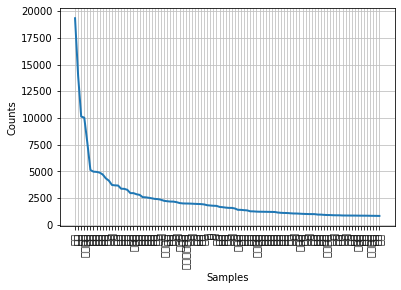

In [235]:
from nltk import Text

text = Text(text_good)
text.plot(100)
plt.show()



*   한계기업


In [236]:
len(df['text'][df['Group'] == 'Marginal'])

108

In [239]:
text_marginal = []
for i in range(108):
  text_marginal.extend(df['text'][i].split())

len(text_marginal)

89956

In [243]:
from collections import Counter
    
text_marginal_counter = Counter(text_marginal)
text_marginal_counter.most_common

<bound method Counter.most_common of Counter({'감사': 5037, '연결': 3546, '우리': 2672, '재무제표': 2654, '사항': 1969, '표시': 1325, '대한': 1321, '관련': 1302, '의견': 1263, '책임': 1233, '기업': 1112, '회사': 1094, '및': 975, '대하': 972, '평가': 965, '수행': 902, '왜곡': 867, '해당': 861, '유의': 791, '보고서': 776, '부정': 754, '영진': 745, '근거': 697, '회계': 692, '공시': 684, '지배': 651, '기구': 636, '계속': 635, '이': 618, '내부통제': 589, '경우': 587, '합리': 569, '것': 561, '핵심': 551, '오류로': 543, '위': 528, '입수': 522, '커뮤니케이션': 519, '보고': 515, '증거': 512, '절차': 512, '기준': 511, '위험': 509, '수': 489, '년': 475, '월': 472, '판단': 453, '상황': 443, '작성': 438, '결론': 425, '중': 419, '포함': 407, '전문가': 378, '기간': 375, '계약': 371, '기술': 356, '사용': 353, '수익': 346, '사건': 336, '발견': 327, '확신': 326, '요구사항': 325, '존속': 324, '식별': 323, '윤리': 321, '재무': 313, '현재': 310, '결정': 303, '인식': 298, '자산': 294, '정책': 293, '존재': 293, '일': 291, '발생': 291, '거래': 289, '대해': 287, '등': 283, '불확실': 281, '종료': 270, '여부': 267, '검토': 258, '예상': 252, '주석': 244, '회계기준': 243, '추정': 243, '

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_

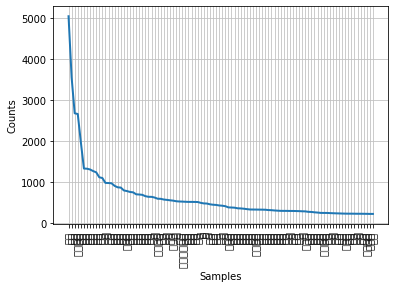

In [241]:
from nltk import Text

text = Text(text_marginal)
text.plot(100)
plt.show()

## 워드 클라우드

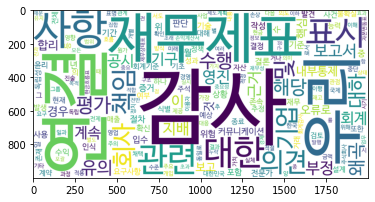

In [195]:
# 우량기업 클라우드

from wordcloud import WordCloud
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               background_color = 'white',
               width=1000, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(text_good_counter)
plt.figure()
plt.imshow(gen)

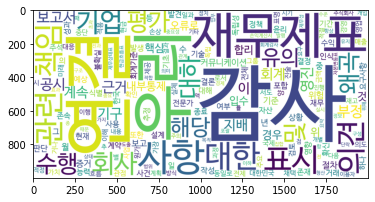

In [246]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', 
               background_color = 'white',
               width=1000, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(text_marginal_counter)
plt.figure()
plt.imshow(gen)

### 전체로

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [42]:
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2) # 이부분 고치기 ngram
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram 미포함 

feat_vect = count_vectorizer.fit_transform(tokenized_list)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (516, 1000)


In [45]:
lda = LatentDirichletAllocation(n_components=10)  # 토픽 수
lda.fit(feat_vect)

LatentDirichletAllocation()

In [46]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda, feature_names, 10)

Topic # 0
상장폐지 심사 개선 상장 위원회 코스닥시장 심의 규정 실질 제출
Topic # 1
개발 분할 게임 무형 어떠한 충족 자본 자의 형태 한편
Topic # 2
법인세 채무 한정 지급 제거 집계 매입 복잡 의사록 이사회
Topic # 3
분류 재작성 수수료 해외 관측 반품 기법 시스템 상품 데이터
Topic # 4
공사 청구 입법 건설 예정 원인 지연 파악 국외 현장
Topic # 5
전환사채 객관성 영구 파생상품 민감 모형 결합 매년 차손 의해
Topic # 6
상품 대손충당금 신용 설정 대출 산출 계약금 분류 부도 경상
Topic # 7
없었습니다 거절 확보 자금 유동 수도 필요한지 본인 체적 구성요소
Topic # 8
장비 생산 인도 주문 배분 코로나바이러스 감염증 확산 세부 관심
Topic # 9
주식 억원 진부 부합 차손 신규 최근 설정 대여 자의


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 776 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1697199d72474baec0656d41d5fb01bc1928ee00e739355c1eb092b2bfb95ff6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [48]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-on

## 부실만

In [249]:
tokenized_list_marginal = df[df['Group'] == 'Marginal']['text'].tolist()
tokenized_list_good = df[df['Group'] == 'Good']['text'].tolist()

In [250]:
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.05, max_features=1000, min_df=3)
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram도 포함

feat_vect_marginal = count_vectorizer.fit_transform(tokenized_list_marginal)
print('CountVectorizer Shape:', feat_vect_marginal.shape)

CountVectorizer Shape: (108, 194)


In [257]:
lda_marginal = LatentDirichletAllocation(n_components=5)  # 토픽 수
lda_marginal.fit(feat_vect_marginal)

LatentDirichletAllocation(n_components=5)

In [258]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda_marginal, feature_names, 10)

Topic # 0
건설 공사 보통주 납입 원인 신청 분법 호의 본인 제자
Topic # 1
개발 회차 충당 소유 기업인 홀딩스 유동성 설정 진부 영구
Topic # 2
대손충당금 과소 동의 인과 리기 자간 사실관계 설정 파생상품 본부
Topic # 3
사채 형식 코스닥 에이 코로나바이러스 감염증 벌점 관성 동안 비적정
Topic # 4
코스 무형 배분 관리 화장품 건설 부외 참조 가격 우발


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [259]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis_marginal = pyLDAvis.sklearn.prepare(lda_marginal, feat_vect_marginal, count_vectorizer)
pyLDAvis.display(vis_marginal)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


## 우량만

In [260]:
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2)
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram도 포함

feat_vect_good = count_vectorizer.fit_transform(tokenized_list_good)
print('CountVectorizer Shape:', feat_vect_good.shape)

CountVectorizer Shape: (408, 920)


In [261]:
lda_good = LatentDirichletAllocation(n_components=5)  # 토픽 수
lda_good.fit(feat_vect_good)

LatentDirichletAllocation(n_components=5)

In [263]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
display_topics(lda_good, feature_names, 10)

Topic # 0
금융 상품 분류 신용 부문 대상 해외 관측 수수료 생산
Topic # 1
수출 국외 본인 세부 지급 권리 게임 실사 고의 추세
Topic # 2
청구 입법 건설 예정 원인 지연 현장 장비 상치 법인세
Topic # 3
특수 관계자 잔액 대손충당금 반품 부문 채무 거래처 제거 매입
Topic # 4
개발 투자 배분 주식 무형 결합 인수 자본 대치 달성


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [264]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis_good = pyLDAvis.sklearn.prepare(lda_good, feat_vect_good, count_vectorizer)
pyLDAvis.display(vis_good)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


### Tomotopy 사용

In [ ]:
df.head()

표준코드   단축코드  한글 종목명 한글 종목약명            영문 종목명         상장일    시장구분  \
0  KR7044180008   9730      코센      코센   KOSSEN Co.,Ltd.  1990-07-27  KOSDAQ   
1  KR7098460009  16670  인피니티엔티  인피니티엔티       INFINITY NT  1993-04-21  KOSDAQ   
2  KR7053270005   6580  대양제지공업    대양제지   DaeyangPaperMfg  1993-12-29  KOSDAQ   
3  KR7293580007  24830    세원물산    세원물산  SewonCorporation  1994-12-29  KOSDAQ   
4  KR7194700001  29480      광무      광무           Kwangmu  1996-08-27  KOSDAQ   

  증권구분          소속부 주식종류  액면가        상장주식수   연결  \
0   주권  관리종목(소속부없음)  보통주  500   18,814,297  1.0   
1   주권  관리종목(소속부없음)  보통주  500  100,258,024  1.0   
2   주권  관리종목(소속부없음)  보통주  500   26,850,000  1.0   
3   주권  관리종목(소속부없음)  보통주  500    8,350,000  1.0   
4   주권  관리종목(소속부없음)  보통주  100  113,955,215  1.0   

                                               감사보고서 수주산업  \
0  의견거절\n\n우리는 주식회사 코센과 그 종속기업(이하 "연결실체")의 재무제표에 ...  NaN   
1  감사의견\n우리는 주식회사 인피니티엔티(구, 주식회사 포비스티앤씨)와 그 종속기업(...  NaN   
2  감사의견\n우리는 대양제지공업주식회사와 그 종속기업(이하  "연결회사”)의 연결재무...  NaN   
3  감사의견\n우리는 별첨된 주식회사 세원물산(이하 "회사")의 재무제표를 감사하였습니...  NaN   
4  \n감사의견\n\n우리는 주식회사 광무(이하 "회사")와 그 종속기업(구, 주식회사...  NaN   

                                 preprocessed_corpus  \
0  의견거절우리는 주식회사 코센과 그 종속기업 이하  연결실체  의 재무제표에 대한 감...   
1  감사의견우리는 주식회사 인피니티엔티 구  주식회사 포비스티앤씨 와 그 종속기업 이하...   
2  감사의견우리는 대양제지공업주식회사와 그 종속기업 이하   연결회사  의 연결재무제표...   
3  감사의견우리는 별첨된 주식회사 세원물산 이하  회사  의 재무제표를 감사하였습니다 ...   
4  감사의견우리는 주식회사 광무 이하  회사  와 그 종속기업 구  주식회사 릭스솔루션...   

                                                text Group  
0  의견 거절 우리 주식회사 코센 그 종 기업 이하 연결 실체 의 재무제표 대한 감사 ...    한계  
1  감사 의견 우리 주식회사 인피니티 티 구 주식회사 포비 스티 앤 와 그 종 기업 이...    한계  
2  감사 의견 우리 공업 주식회사 그 종 기업 이하 연결 회사 의 연결 재무제표 감사하...    한계  
3  감사 의견 우리 별 된 주식회사 물산 이하 회사 의 재무제표 감사하였습니다 해당 재...    한계  
4  감사 의견 우리 주식회사 광무 이하 회사 와 그 종 기업 구 주식회사 릭스 솔루션 ...    한계

In [265]:
## 토크나이징 함수 선언
def tokenize(sent):
    res, score = kiwi.analyze(sent)[0] # 첫번째 결과를 사용
    return [word + ('다' if tag.startswith('V') else '') # 동사에는 '다'를 붙여줌
            for word, tag, _, _ in res
            if not tag.startswith('E') and not tag.startswith('J') and not tag.startswith('S')] # 조사, 어미, 특수기호 포함된 단어는 제거

In [65]:
## 토크나이징 함수 선언 (품사 포함)
def tokenize_tag(sent):
    res, score = kiwi.analyze(sent)[0] # 첫번째 결과를 사용
    return [word + ('다' if tag.startswith('V') else '') +'/'+tag # 동사에는 '다'를 붙여줌 + / 품사
            for word, tag, _, _ in res
            if not tag.startswith('E') and not tag.startswith('J') and not tag.startswith('S')] # 조사, 어미, 특수기호 포함된 단어는 제거

In [67]:
df.columns

Index(['표준코드', '단축코드', '한글 종목명', '한글 종목약명', '영문 종목명', '상장일', '시장구분', '증권구분',
       '소속부', '주식종류', '액면가', '상장주식수', '연결', '감사보고서', '수주산업',
       'preprocessed_text', 'text', 'Group'],
      dtype='object')

In [266]:
# token이라는 컬럼에 토크나이징 결과를 넣는다.
df['token'] = df['preprocessed_text'].progress_map(lambda x:tokenize(x)) 

  0%|          | 0/516 [00:00<?, ?it/s]

In [267]:
from collections import Counter
df['token'].apply(lambda x: Counter(x))

0      {'감사': 56, '의견': 14, '우리다': 1, '주식회사': 1, '제주'...
1      {'감사': 49, '의견': 13, '우리다': 1, '주식회사': 1, '이엔드...
2      {'감사': 44, '의견': 13, '우리다': 1, '주식회사': 1, '더네이...
3      {'감사': 47, '의견': 12, '우리다': 1, '주식회사': 1, '신도'...
4      {'감사': 41, '의견': 10, '우리다': 1, '주식회사': 1, '녹십자...
                             ...                        
511    {'감사': 53, '의견': 17, '우리다': 1, '주식회사': 1, '일야과...
512    {'한정': 3, '의견': 13, '우리다': 1, '주식회사': 1, '포인트'...
513    {'의견': 8, '거절': 4, '우리다': 1, '주식회사': 1, '코센': ...
514    {'감사': 57, '의견': 18, '우리다': 1, '주식회사': 1, '스포츠...
515    {'의견': 9, '거절': 4, '우리': 9, '명성': 1, '티': 1, '...
Name: token, Length: 516, dtype: object

In [70]:
# 불용어 리스트
stopwords = set(['우리다/VY','하다/VV','하다/VX','위하다/VV','되다/VV','있다/VV', '있다/VX','없다/VA','않다/VX','있다/VV'])

In [71]:
# 불용어 제거
df['token'] = df['token'].map(lambda x:[w for w in x if not w in set(stopwords)]) 

In [268]:
LDA = tp.LDAModel(k=10,min_df=100,tw=tp.TermWeight.IDF,rm_top=3, seed=2021) 

In [269]:
for token in tqdm(df['token'].tolist()):
    LDA.add_doc(token)

  0%|          | 0/516 [00:00<?, ?it/s]

In [270]:
# 학습 준비
LDA.train(0)

In [271]:
# 한번에 20회씩 총 500회 학습
print('Num docs:', len(LDA.docs), ', Vocab size:', LDA.num_vocabs, ', Num words:', LDA.num_words)
print('Removed top words:', LDA.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 500, 20):
    LDA.train(20)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, LDA.ll_per_word))

Training...


Num docs: 516 , Vocab size: 330 , Num words: 462637
Removed top words: ['하', '감사', '연결']
Iteration: 0	Log-likelihood: -6.050819361494873
Iteration: 20	Log-likelihood: -5.951773502652203
Iteration: 40	Log-likelihood: -5.871174364378129
Iteration: 60	Log-likelihood: -5.793222371897536
Iteration: 80	Log-likelihood: -5.729734666752182
Iteration: 100	Log-likelihood: -5.681930647395167
Iteration: 120	Log-likelihood: -5.630332019526395
Iteration: 140	Log-likelihood: -5.573328190956809
Iteration: 160	Log-likelihood: -5.546681582409596
Iteration: 180	Log-likelihood: -5.525571816367141
Iteration: 200	Log-likelihood: -5.485642204193049
Iteration: 220	Log-likelihood: -5.458139653690159
Iteration: 240	Log-likelihood: -5.4293044089474884
Iteration: 260	Log-likelihood: -5.4102889842297595
Iteration: 280	Log-likelihood: -5.409414092679189
Iteration: 300	Log-likelihood: -5.38682870448327
Iteration: 320	Log-likelihood: -5.387457137561735
Iteration: 340	Log-likelihood: -5.381320740507545
Iteration: 360	L

In [272]:
# 학습 결과
LDA.summary()

<Basic Info>
| LDAModel (current version: 0.12.2)
| 516 docs, 462637 words
| Total Vocabs: 3488, Used Vocabs: 330
| Entropy of words: 5.18671
| Entropy of term-weighted words: 5.11416
| Removed Vocabs: 하 감사 연결
|
<Training Info>
| Iterations: 500, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -5.36159
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 0 (minimum collection frequency of words)
| min_df: 100 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 10 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 2021 (random seed)
| trained in version 0.12.2
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.12346169 0

In [273]:
for i in range(LDA.k):
    res = LDA.get_topic_words(i, top_n=10) # top 10
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	계약, 변동, 률, 수익, 산정, 금액, 측정, 문서, 인식, 분석
Topic #1	자산, 가치, 장부, 원, 가능, 백만, 금액, 시점, 처리, 손상
Topic #2	가치, 측정, 자산, 외부, 선정, 원, 변동, 적격, 가정, 이용
Topic #3	판매, 검증, 계산, 정확, 측정, 재, 처리, 고객, 상, 통하다
Topic #4	수익, 매출, 인식, 추출, 귀속, 시점, 표본, 이전, 고객, 판매
Topic #5	손상, 창출, 자산, 검사, 서, 가정, 적격, 외부, 장부, 말
Topic #6	전기, 백만, 원, 기울이다, 일자, 반영, 강조, 설명, 동, 불확실
Topic #7	양, 그룹, 이유, 고려, 차, 핵심, 국제, 통하다, 방법, 같다
Topic #8	손상, 권, 할인, 창출, 가치, 율, 률, 가정, 검사, 장부
Topic #9	회수, 액, 가능, 산정, 재, 승인, 검증, 계상, 검토, 전기


In [274]:
# 토픽 제목 자동으로 붙이기(참고)
# extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=10, min_df=100, max_len=5, max_cand=10000)
cands = extractor.extract(LDA)

labeler = tp.label.FoRelevance(LDA, cands, min_df=100, smoothing=1e-2, mu=0.25)
for k in range(LDA.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in LDA.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: 변동, 계약, 조건, 계약서, 률
계약	0.23657271265983582
변동	0.09173359721899033
률	0.08213968575000763
수익	0.0797601118683815
산정	0.03488394245505333
금액	0.033973511308431625
측정	0.03389589488506317
문서	0.027631070464849472
인식	0.02660359814763069
분석	0.024492502212524414

== Topic #1 ==
Labels: 자산, 가치, 장부, 평가 핵심 감사, 평가 핵심
자산	0.37959548830986023
가치	0.073015496134758
장부	0.049226582050323486
원	0.04890154302120209
가능	0.04862229898571968
백만	0.0464533232152462
금액	0.03924529626965523
시점	0.025646550580859184
처리	0.022999471053481102
손상	0.01982264593243599

== Topic #2 ==
Labels: 측정, 가치, 가치 평가, 사용 되, 할인 율
가치	0.28046533465385437
측정	0.24274727702140808
자산	0.09059536457061768
외부	0.042060062289237976
선정	0.038924191147089005
원	0.034221451729536057
변동	0.03386494144797325
적격	0.03330813720822334
가정	0.030442919582128525
이용	0.02976432628929615

== Topic #3 ==
Labels: 검증, 재 계산, 계산, 정확 성, 정확
판매	0.15415582060813904
검증	0.14641432464122772
계산	0.14236044883728027
정확	0.09867341071367264
측정	0.0901607871055603
재	

## Group 나눠서

In [275]:
df.columns

Index(['표준코드', '단축코드', '한글 종목명', '한글 종목약명', '영문 종목명', '상장일', '시장구분', '증권구분',
       '소속부', '주식종류', '액면가', '상장주식수', '연결', '감사보고서', '수주산업',
       'preprocessed_text', 'Group', 'text', 'token'],
      dtype='object')

In [276]:
DMR = tp.DMRModel(k=10,min_df=100,tw=tp.TermWeight.PMI,rm_top=3, seed=2021)

In [277]:
token_politics_dict = df[['token','Group']].to_dict('index')

In [278]:
for k in tqdm(token_politics_dict.keys()):
    DMR.add_doc(token_politics_dict[k]['token'],token_politics_dict[k]['Group'])

  0%|          | 0/516 [00:00<?, ?it/s]

In [279]:
DMR.train(0)

In [280]:
# 한번에 20회씩 총 500회 학습
print('Num docs:', len(DMR.docs), ', Vocab size:', DMR.num_vocabs, ', Num words:', DMR.num_words)
print('Removed top words:', DMR.removed_top_words)
print('Training...', file=sys.stderr, flush=True)
for i in range(0, 500, 20):
    DMR.train(20)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, DMR.ll_per_word))

Training...


Num docs: 516 , Vocab size: 330 , Num words: 462637
Removed top words: ['하', '감사', '연결']
Iteration: 0	Log-likelihood: -5.518394728847532
Iteration: 20	Log-likelihood: -5.371951333102863
Iteration: 40	Log-likelihood: -5.352356792782113
Iteration: 60	Log-likelihood: -5.336718317445744
Iteration: 80	Log-likelihood: -5.333356285414899
Iteration: 100	Log-likelihood: -5.3409013162883285
Iteration: 120	Log-likelihood: -5.334642775957247
Iteration: 140	Log-likelihood: -5.32572973054492
Iteration: 160	Log-likelihood: -5.327012600631299
Iteration: 180	Log-likelihood: -5.327178803921244
Iteration: 200	Log-likelihood: -5.3324687390068695
Iteration: 220	Log-likelihood: -5.332224420982706
Iteration: 240	Log-likelihood: -5.33162676593685
Iteration: 260	Log-likelihood: -5.328842376958766
Iteration: 280	Log-likelihood: -5.326838660325797
Iteration: 300	Log-likelihood: -5.318581722649541
Iteration: 320	Log-likelihood: -5.3273749856077535
Iteration: 340	Log-likelihood: -5.3231573225741435
Iteration: 360	

In [281]:
for i in range(DMR.k):
    res = DMR.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Topic #0	계약, 변동, 금액, 률, 수익, 추정, 발생, 주요, 산정, 성
Topic #1	원, 백만, 거래, 및, 등, 회사, 당기, 공시, 액, 종속
Topic #2	재무제표, 되, 감사인, 전기, 반영, 재, 적정, 기타, 사항, 표명
Topic #3	자산, 기업, 평가, 가능, 검토, 성, 계산, 회수, 화, 검증
Topic #4	매출, 수익, 인식, 고객, 기간, 귀속, 판매, 추출, 표본, 이전
Topic #5	주석, 바, 설명, 같이, 기울이다, 영향, 회사, 불확실, 있다, 강조
Topic #6	년, 월, 일, 회사, 없다, 수, 재무제표, 충분, 하다, 일자
Topic #7	손상, 현금, 창출, 권, 사용, 평가, 영업, 할인, 율, 추정
Topic #8	적, 우리, 사항, 표시, 들, 중요, 왜곡, 책임, 부정, 있다
Topic #9	가치, 공정, 측정, 평가, 수준, 손익, 사업, 전문가, 및, 집합


In [282]:
# extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=10, min_df=100, max_len=5, max_cand=10000)
cands = extractor.extract(DMR)

labeler = tp.label.FoRelevance(DMR, cands, min_df=100, smoothing=1e-2, mu=0.25)
for k in range(DMR.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in DMR.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: 변동, 계약, 률, 조건, 계약서
계약	0.19678078591823578
변동	0.04653952643275261
금액	0.04119151085615158
률	0.0410192646086216
수익	0.040707066655159
추정	0.034664664417505264
발생	0.018831374123692513
주요	0.018078695982694626
산정	0.018037522211670876
성	0.016294000670313835

== Topic #1 ==
Labels: 백만 원, 백만, 원 이다, 원, 할인 율
원	0.15727931261062622
백만	0.13366751372814178
거래	0.12822183966636658
및	0.09007029235363007
등	0.049633581191301346
회사	0.044419459998607635
당기	0.036414872854948044
공시	0.03372905030846596
액	0.02481480874121189
종속	0.023942328989505768

== Topic #2 ==
Labels: 반영, 전기, 계상, 강조 사항 감사 의견 영향, 강조 사항 감사
재무제표	0.0672038346529007
되	0.06486870348453522
감사인	0.05701699107885361
전기	0.045975059270858765
반영	0.04045470431447029
재	0.037280190736055374
적정	0.037082739174366
기타	0.03613486513495445
사항	0.03527482599020004
표명	0.03180018439888954

== Topic #3 ==
Labels: 자산, 검증, 재 계산, 평가 핵심 감사, 평가 핵심
자산	0.1875295788049698
기업	0.07916112244129181
평가	0.04371204599738121
가능	0.03625032678246498
검토	0.031162060

In [283]:
DMR.metadata_dict

['Good', 'Marginal']

Topic rate by groups
Good [0.04710024 0.05483605 0.07337367 0.13064383 0.15782905 0.06521374
 0.04554297 0.05571003 0.31737372 0.05237668] 

Marginal [0.00667245 0.07650564 0.10089544 0.060098   0.04819241 0.17708936
 0.31812954 0.06303378 0.11949652 0.02988683] 



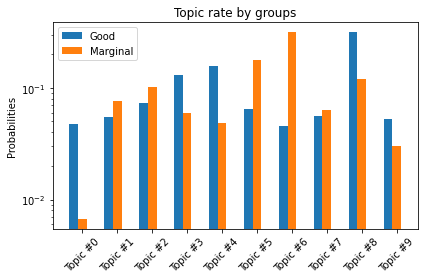

In [284]:
# calculate topic distribution for each metadata using softmax
probs = np.exp(DMR.lambdas - DMR.lambdas.max(axis=0))
probs /= probs.sum(axis=0)

print('Topic rate by groups')
for f, metadata_name in enumerate(DMR.metadata_dict):
    print(metadata_name, probs[:, f], '\n')

x = np.arange(DMR.k)
width = 1 / (DMR.f + 2)

fig, ax = plt.subplots()
for f, metadata_name in enumerate(DMR.metadata_dict):
    ax.bar(x + width * (f - DMR.f / 2), probs[:, f], width, label=DMR.metadata_dict[f])

ax.set_ylabel('Probabilities')
ax.set_yscale('log')
ax.set_title('Topic rate by groups')
ax.set_xticks(x)
ax.set_xticklabels(['Topic #{}'.format(k) for k in range(DMR.k)],rotation=45) # x축 라벨 45도로 회전
ax.legend()

fig.tight_layout()
plt.show()

https://chaelist.github.io/docs/ml_application/topic_modeling/



https://happy-obok.tistory.com/5#topic=0&lambda=1&term=